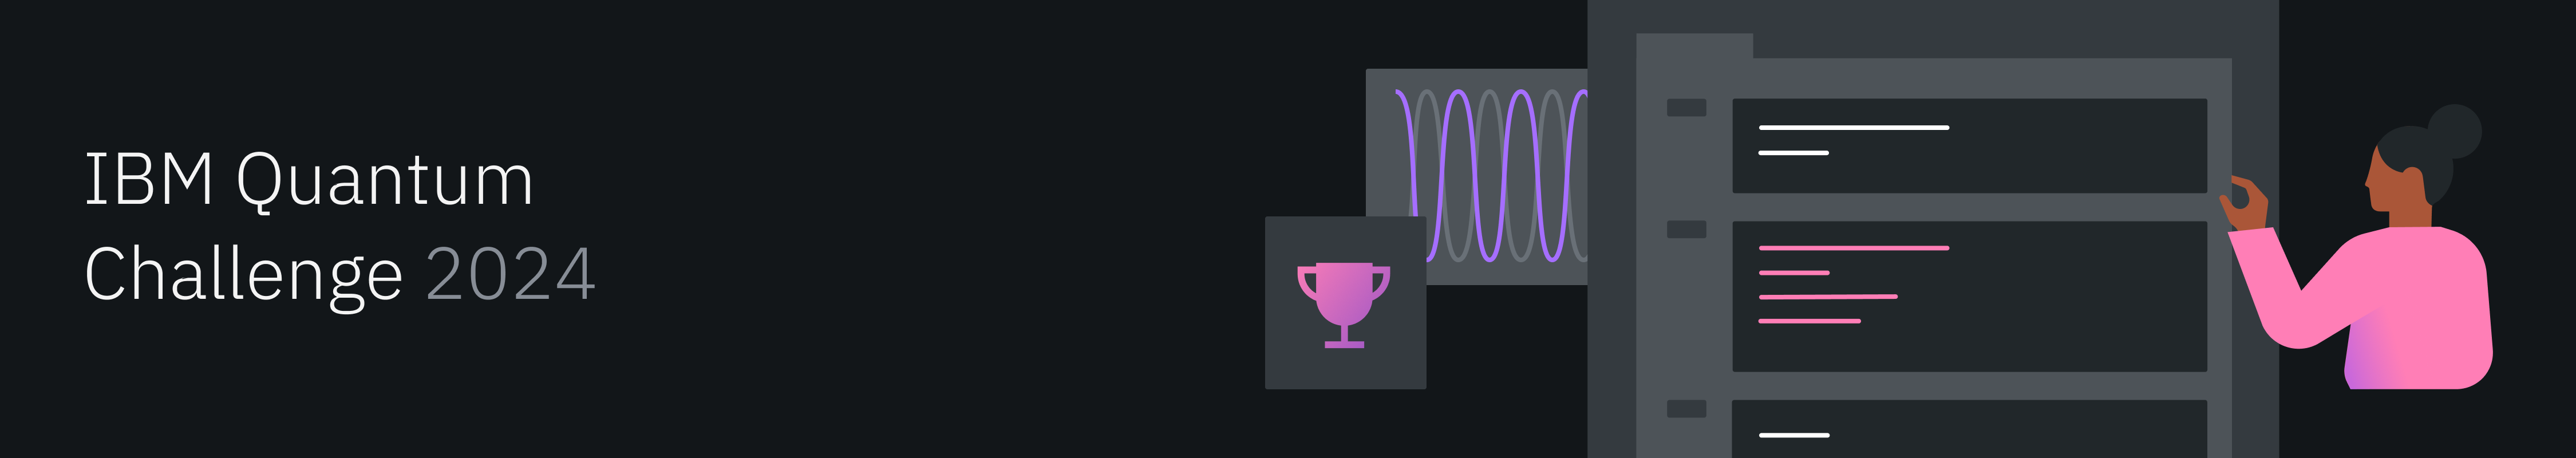

# Lab 1: Qiskit 1.0 „Å∏„Çà„ÅÜ„Åì„Åù

## „Çª„ÉÉ„Éà„Ç¢„ÉÉ„Éó

In [ ]:
### Install Qiskit, if needed

!pip install qiskit[visualization]==1.0.2
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install prototype-zne

In [1]:
# Load your API token in .env

%load_ext dotenv
%dotenv

In [2]:
# imports
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

## „ÅØ„Åò„ÇÅ„Å´

Lab 1 „Å∏„Çà„ÅÜ„Åì„ÅùÔºÅ„Åì„ÅÆÊúÄÂàù„ÅÆ Lab „ÅØ„ÄÅ Qiskit 1.0„ÅÆÊñ∞Ê©üËÉΩ„ÅÆ‰∏ÄÈÉ®„ÇíÁ¥π‰ªã„Åô„Çã„Åü„ÇÅ„ÅÆ„ÇÇ„ÅÆ„Åß„Åô„ÄÇÂæå„ÅÆ Challenge „Åß„ÅØ„Åì„Çå„Çâ„ÅÆÊ©üËÉΩ„Çí„Åï„Çâ„Å´Áô∫Â±ï„Åï„Åõ„ÄÅ„Çà„ÇäË§áÈõë„Å™ Qiskit „ÅÆÊñ∞Ê©üËÉΩ„ÇíÁ¥π‰ªã„Åó„Åæ„Åô„ÄÇ

„Åì„ÅÆ Lab „Åß„ÅØ„ÄÅQiskit„Çí‰ΩøÁî®„Åó„Å¶ÈáèÂ≠êÁä∂ÊÖã„ÇíË®≠ÂÆö„Åô„ÇãÊñπÊ≥ï„Å®„ÄÅVQE„Çí‰ΩøÁî®„Åó„Å¶ÊúÄÈÅ©Âåñ„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÇíÂÆüË£Ö„Åô„ÇãÊñπÊ≥ï„ÇíÂ≠¶„Å≥„Åæ„Åô„ÄÇ„Åì„ÅÆ2„Å§„ÅÆ„Çø„Çπ„ÇØ„ÅØ2„Å§„ÅÆ„Çª„ÇØ„Ç∑„Éß„É≥„Å´ÂàÜ„Åã„Çå„Å¶„ÅÑ„Åæ„ÅôÔºö

1) Qiskit„ÅÆÁä∂ÊÖã„ÄÅÊñ∞„Åó„ÅÑ„ÇÇ„ÅÆ„Å®Âè§„ÅÑ„ÇÇ„ÅÆ 
2) Qiskit 1.0 „Çí‰Ωø„Å£„Åü VQE

„Åù„Çå„Åß„ÅØÂßã„ÇÅ„Åæ„Åó„Çá„ÅÜÔºÅ

## Part I: Qiskit„ÅÆÁä∂ÊÖã„ÄÅÊñ∞„Åó„ÅÑ„ÇÇ„ÅÆ„Å®Âè§„ÅÑ„ÇÇ„ÅÆ 

### Exercise 1: ‰∏ÄÈáçÈ†Ö„ÅÆ„Éô„É´Áä∂ÊÖã„ÅÆÂõûË∑Ø„Çí‰Ωú„Å£„Å¶Êèè„Åè

````{admonition} Exercise
„Éô„É´ÂõûË∑Ø„ÅØ„ÄÅ„Éô„É´Áä∂ÊÖã„ÄÅ„Åô„Å™„Çè„Å° EPR „Éö„Ç¢„ÇíÁîüÊàê„Åô„ÇãÁâπÂÆö„ÅÆÂõûË∑Ø„Åß„ÅÇ„Çä„ÄÅ„Ç®„É≥„Çø„É≥„Ç∞„É´„Åï„ÇåÊ≠£Ë¶èÂåñ„Åï„Çå„ÅüÂü∫Â∫ï„Éô„ÇØ„Éà„É´„ÅÆ‰∏ÄÁ®Æ„Çí‰Ωú„ÇãÂõûË∑Ø„Åß„Åô„ÄÇ Ë®Ä„ÅÑÊèõ„Åà„Çå„Å∞„ÄÅÈáèÂ≠ê„Éì„ÉÉ„Éà„ÅÆÈáçË¶Å„Å™ÁâπÊÄß„Åß„ÅÇ„Çã„Ç®„É≥„Çø„É≥„Ç∞„É´„É°„É≥„ÉàÁä∂ÊÖã„ÇíÁîüÊàê„Åô„Çã„Åü„ÇÅ„ÅÆÂõûË∑Ø„Åß„Åô„ÄÇ

4 „Å§„ÅÆÁï∞„Å™„Çã„Éô„É´Áä∂ÊÖã„ÅåÂ≠òÂú®„Åó„Åæ„Åô„ÄÇ „Åù„Çå„Åû„Çå„Å´„Å§„ÅÑ„Å¶„ÄÅ [ÈáèÂ≠êÊÉÖÂ†±„ÅÆÂü∫Á§é„ÅÆ„Éö„Éº„Ç∏](https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems#bell-states) „ÅßÂ≠¶„Å∂„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ

**„ÅÇ„Å™„Åü„ÅÆ„Çø„Çπ„ÇØÔºö** $| \psi ^- \rangle$ „ÅÆ„Éô„É´Áä∂ÊÖã„ÇíÁîüÊàê„Åô„ÇãÂõûË∑Ø„ÇíÊßãÁØâ„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

```python
"""
 Build a circuit to form a psi-minus Bell state
 Apply gates to the provided QuantumCircuit, qc
"""

qc = QuantumCircuit(2)

##### Write your code below here #####



##### Don't change any code past this line #####
qc.measure_all()
qc.draw('mpl')
```
````

```{hint}
$\ket \psi ^- = \frac{1}{\sqrt{2}} (\ket{01} - \ket{10})$ „ÅÆ„Éô„É´Áä∂ÊÖã„Å´„ÅØ„ÄÅZ„Ç≤„Éº„Éà1„Å§„Å®X„Ç≤„Éº„Éà1„Å§„Åå‰Ωø„Çè„Çå„ÄÅ„Å©„Å°„Çâ„ÇÇCNOT„ÅÆÂæå„Å´ÂøÖË¶Å„Åß„Åô„ÄÇ
```

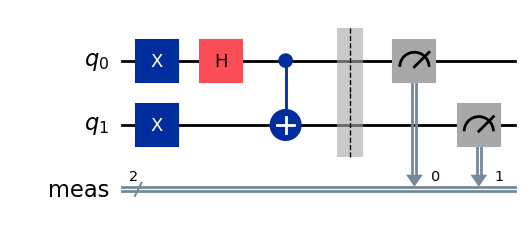

In [3]:
# Build a circuit to form a psi-minus Bell state
# Apply gates to the provided QuantumCircuit, qc

qc = QuantumCircuit(2)

### Write your code below here ###
qc.x(0)
qc.x(1)
qc.h(0)
qc.cx(0,1)
### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

„Åì„ÅÆÂõûË∑Ø„Åå‰Ωú„ÇäÂá∫„Åô„Ç®„É≥„Çø„É≥„Ç∞„É´„Åï„Çå„ÅüÁä∂ÊÖã„ÇíË¶≥ÂØü„Åô„Çã„Åü„ÇÅ„Å´„ÄÅÂõûË∑Ø„Çí‰ΩïÂõû„ÇÇËµ∞„Çâ„Åõ„ÄÅÊúÄÁµÇÁöÑ„Å™ÈáèÂ≠ê„Éì„ÉÉ„Éà„ÅÆÊ∏¨ÂÆöÂÄ§„ÅÆÁµ±Ë®à„ÇíÂèñ„Çä„Åæ„Åô„ÄÇ„Åì„Çå„ÅåÊ¨°„ÅÆ Exercise „ÅÆ„Ç¥„Éº„É´„Åß„Åô„ÄÇ

### Exercise 2: Sampler Primitives „Çí‰Ωø„ÅÜ
````{admonition} Exercise
[Qiskit Sampler](https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.StatevectorSampler) primitive ([Primitives „ÅÆË©≥Á¥∞„ÅØ„Åì„Å°„Çâ](https://docs.quantum.ibm.com/run/primitives-get-started))„ÅØ„ÄÅÊåáÂÆö„Åï„Çå„ÅüÂá∫Âäõ„Çø„Ç§„Éó„Å´Âæì„Å£„Å¶„Çµ„É≥„Éó„É™„É≥„Ç∞„Åï„Çå„ÅüÁµêÊûú„ÇíËøî„Åó„Åæ„Åô„ÄÇÈáèÂ≠êÂõûË∑Ø„ÇíÂÆüË°å„Åó„ÄÅÈáèÂ≠êÁä∂ÊÖã„ÅÆÁ¢∫ÁéáÂàÜÂ∏É„ÇíÊèê‰æõ„Åô„Çã„Åì„Å®„Åß„ÄÅÈáèÂ≠êÁä∂ÊÖã„ÇíÂäπÁéáÁöÑ„Å´„Çµ„É≥„Éó„É™„É≥„Ç∞„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ

**„ÅÇ„Å™„Åü„ÅÆ„Çø„Çπ„ÇØÔºö** Qiskit `StatevectorSampler` „Çí‰ΩøÁî®„Åó„Å¶„ÄÅÂõûË∑Ø„Åã„ÇâÁµêÊûú„ÅÆ„Ç´„Ç¶„É≥„Éà„ÇíÂèñÂæó„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

```python
qc.measure_all()

##### Write your code below here #####


sampler = #Add your code here
pub = #Add your code here
job_sampler = #Add your code here


##### Don't change any code past this line #####

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)
```
````

In [4]:
qc.measure_all()

### Write your code below here ###


sampler = StatevectorSampler() #Add your code here
pub = [qc] #Add your code here
job_sampler = sampler.run(pub) #Add your code here


### Don't change any code past this line ###

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'01': 499, '10': 525}


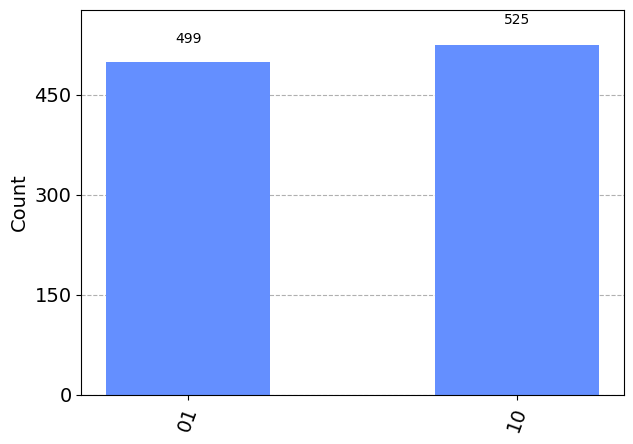

In [5]:
plot_histogram(counts_sampler)

„Éí„Çπ„Éà„Ç∞„É©„É†„ÅØ„ÄÅÁßÅ„Åü„Å°„ÅÆÈáèÂ≠ê„Éì„ÉÉ„Éà„Åå `01` „Åã `10` „ÅÆÁä∂ÊÖã„ÅßË¶ã„Å§„Åã„ÇãÁ¢∫Áéá„Åå„Åª„ÅºÁ≠â„Åó„ÅÑ„Åì„Å®„ÇíÁ§∫„Åó„Å¶„ÅÑ„Å¶„ÄÅ„Ç®„É≥„Çø„É≥„Ç∞„É´„É°„É≥„Éà„ÅåÊúüÂæÖÈÄö„Çä„Å´Ë°å„Çè„Çå„Åü„Åì„Å®„ÇíÁ§∫ÂîÜ„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

### Exercise 3: WÁä∂ÊÖãÂõûË∑Ø„ÇíÊèè„Åè

````{admonition} Exercise
Ê¨°„Å´„ÄÅÂ∞ë„ÅóË§áÈõë„Å™ÂõûË∑Ø„ÇíÈñãÁô∫„Åó„Åæ„Åô„ÄÇ„Éô„É´Áä∂ÊÖãÂõûË∑Ø„Åå„Éô„É´Áä∂ÊÖã„ÇíÁîüÊàê„Åô„Çã„ÅÆ„Å®ÂêåÊßò„Å´„ÄÅWÁä∂ÊÖãÂõûË∑Ø„ÅØ WÁä∂ÊÖã„ÇíÁîüÊàê„Åó„Åæ„Åô„ÄÇ„Éô„É´Áä∂ÊÖã„ÅØ2„Å§„ÅÆÈáèÂ≠ê„Éì„ÉÉ„Éà„Çí„Ç®„É≥„Çø„É≥„Ç∞„É´„Åó„Åæ„Åô„Åå„ÄÅWÁä∂ÊÖã„ÅØ3„Å§„ÅÆÈáèÂ≠ê„Éì„ÉÉ„Éà„Çí„Ç®„É≥„Çø„É≥„Ç∞„É´„Åó„Åæ„Åô„ÄÇWÁä∂ÊÖã„Çí‰Ωú„Çã„Å´„ÅØ„ÄÅ6„Å§„ÅÆÁ∞°Âçò„Å™„Çπ„ÉÜ„ÉÉ„Éó„Å´Âæì„ÅÑ„Åæ„ÅôÔºö

1) 3ÈáèÂ≠ê„Éì„ÉÉ„ÉàÂõûË∑Ø„ÇíÂàùÊúüÂåñ„Åó„Åæ„Åô„ÄÇ
2) ÈáèÂ≠ê„Éì„ÉÉ„Éà„ÅÆRyÂõûËª¢„ÇíË°å„ÅÑ„Åæ„Åô„ÄÇ„Åì„ÅÆÊºîÁÆó„ÅØ‰∏é„Åà„Çâ„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ
3) Âà∂Âæ°„Ç¢„ÉÄ„Éû„Éº„É´„Ç≤„Éº„Éà„Çíqubit 0„ÇíÂà∂Âæ°„Éì„ÉÉ„Éà„Å®„Åó„Å¶qubit 1„Å´ÂÆüË°å„Åó„Åæ„Åô„ÄÇ
4) qubit 1„ÇíÂà∂Âæ°„Éì„ÉÉ„Éà„ÄÅqubit 2„ÇíÁõÆÊ®ô„Éì„ÉÉ„Éà„Å®„Åó„Å¶„ÄÅCNOT„Ç≤„Éº„Éà„ÇíÂÆüË°å„Åó„Åæ„Åô„ÄÇ
5) qubit 0„ÇíÂà∂Âæ°„Éì„ÉÉ„Éà„ÄÅqubit 1„ÇíÁõÆÊ®ô„Éì„ÉÉ„Éà„Å®„Åó„Å¶„ÄÅCNOT„Ç≤„Éº„Éà„ÇíÂÆüË°å„Åó„Åæ„Åô„ÄÇ
6) qubit 0„Å´X„Ç≤„Éº„Éà„ÇíËøΩÂä†„Åó„Åæ„Åô„ÄÇ

**„ÅÇ„Å™„Åü„ÅÆ„Çø„Çπ„ÇØÔºö** W-Áä∂ÊÖãÂõûË∑Ø„ÇíÊßãÁØâ„Åô„ÇãÊâãÈ†Ü„Å´Âæì„Å£„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

```python
##### Step 1
qc = #your_code_here

##### Step 2 (provided)
qc.ry(1.91063324, 0)

##### Add steps 3-6 below




##### Don't change any code past this line #####
qc.measure_all()
qc.draw('mpl')
```
````

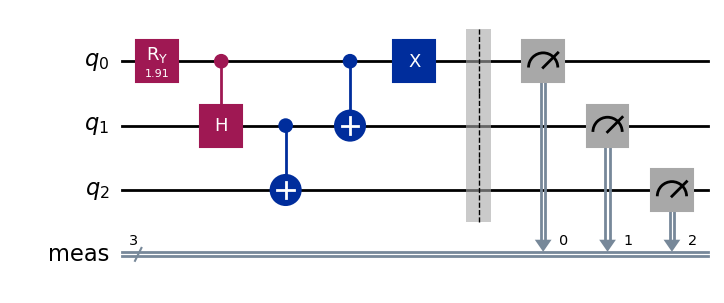

In [6]:
# Step 1
qc = QuantumCircuit(3) #your_code_here

# Step 2 (provided)
qc.ry(1.91063324, 0)

# Add steps 3-6 below
qc.ch(0, 1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.x(0)

### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

„ÇÇ„ÅÜ‰∏ÄÂ∫¶„ÄÅÁµêÊûú„ÇíË¶ñË¶öÂåñ„Åó„Å¶„Åø„Åæ„Åó„Çá„ÅÜÔºö

In [7]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'010': 3320, '100': 3404, '001': 3276}


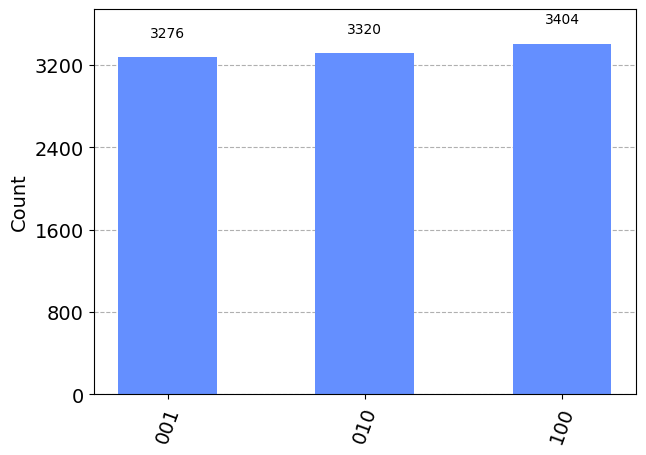

In [8]:
plot_histogram(counts_sampler)

ÂêàË®à„Ç´„Ç¶„É≥„Éà„Åå 3 „Å§„ÅÆÁä∂ÊÖã„Å´Âêå„Åò„Çà„ÅÜ„Å´ÂàÜÂ∏É„Åó„Å¶„ÅÑ„Çã„Åì„Å®„Åå„Çè„Åã„Çä„ÄÅW-Áä∂ÊÖã„Åß„ÅÇ„Çã„Åì„Å®„ÅåÁ§∫„Åï„Çå„Åæ„Åó„Åü„ÄÇ

Âü∫Êú¨ÁöÑ„Å™ÂõûË∑Ø„ÇíÁêÜËß£„Åó„Åü„Å®„Åì„Çç„Åß„ÄÅQiskit 1.0„Çí‰Ωø„Å£„Å¶„Çà„ÇäË§áÈõë„Å™„Ç≥„Éº„Éâ„ÅÆÂ∞éÂÖ•„Å®ÈñãÁô∫„ÇíÂßã„ÇÅ„Åæ„Åô„ÄÇ

## Part II: Qiskit 1.0 „Åß„ÅÆ VQE

„Åì„ÅÆ Challenge „ÅÆ‰∏≠Ê†∏„ÅØ Qiskit Runtime „Å® Â§âÂàÜÈáèÂ≠êÂõ∫ÊúâÂÄ§„ÇΩ„É´„Éê„Éº (Variational Quantum Eigensolver, VQE) „ÇíÊ¥ªÁî®„Åó„Åæ„Åô„ÄÇÈáèÂ≠ê„Éì„ÉÉ„Éà„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„ÅÆÊúüÂæÖÂÄ§„ÇíË®àÁÆó„Åô„Çã„Åü„ÇÅ„Å´ Qiskit Runtime Estimator „Çí‰ΩøÁî®„Åó„ÄÅ VQE „Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅÆÂÆüË°å„ÇíÂÆπÊòì„Å´„Åô„Çã„Åü„ÇÅ„Å´ Qiskit Runtime Sessions „Çí‰ΩøÁî®„Åó„Åæ„Åô„ÄÇ„Åì„ÅÆ Challenge „ÅØ„ÄÅÂÆüÈ®ìÁâ©ÁêÜÂ≠¶ËÄÖ„Åß IBM „ÅÆÈáèÂ≠êÁ†îÁ©∂ËÄÖ„Åß„ÅÇ„Çã Nick Bronn „Åå [Coding with Qiskit Runtime video series](https://www.youtube.com/playlist?list=PLOFEBzvs-VvqAC8DnVoLOzg2bKE4C7ARM) „ÄÅÁâπ„Å´ [Episode 05 Primitives & Sessions](https://youtu.be/yxuH8eb4MS4?si=e3trSORNjooWlQXu) „ÅÆ„Åü„ÇÅ„Å´‰ΩúÊàê„Åó„Åü‰æã„ÅÆ„Ç≥„Éº„Éâ„ÇíÂà©Áî®„Åó„ÄÅÊúÄÊñ∞„ÅÆ Qiskit 1.0 „Éê„Éº„Ç∏„Éß„É≥„Çí‰ΩøÁî®„Åó„Å¶ÂÆüË£Ö„Åó„Åæ„Åô„ÄÇ

### „Éë„Ç¶„É™ÊºîÁÆóÂ≠ê„Çí‰Ωú„Çã

„Éë„Ç¶„É™ÊºîÁÆóÂ≠ê„ÅØ„ÄÅÁâπÂÆö„ÅÆËª∏ (x, y, z) „Å´Ê≤ø„Å£„Åü„Çπ„Éî„É≥„ÅÆÊ∏¨ÂÆö„Å´ÂØæÂøú„Åô„ÇãÈáèÂ≠êÂäõÂ≠¶ÁöÑË¶≥Ê∏¨Èáè„ÇíË°®„ÅôË°åÂàó„Åß„Åô„ÄÇ‰Ωú„Å£„Å¶„Åø„Åæ„Åó„Çá„ÅÜÔºö

In [9]:
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


„Åï„Åæ„Åñ„Åæ„Å™„Éë„Ç¶„É™ÊºîÁÆóÂ≠ê„Çí‰Ωø„Å£„Å¶„ÄÅ„Å©„ÅÆ„Çà„ÅÜ„Å™ÁµÑ„ÅøÂêà„Çè„Åõ„ÅåÂæó„Çâ„Çå„Çã„Åã„ÄÅËá™Áî±„Å´ÂÆüÈ®ì„Åó„Å¶„Åø„Å¶„Åè„Å†„Åï„ÅÑÔºÅ

### VQE„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅÆ„Çª„ÉÉ„Éà„Ç¢„ÉÉ„Éó„Å®ÂÆüË°å

Ê¨°„Å´„ÄÅVQE„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅÆ„Çª„ÉÉ„Éà„Ç¢„ÉÉ„Éó„ÇíÂßã„ÇÅ„Åæ„Åô„ÄÇÂ§âÂàÜÈáèÂ≠êÂõ∫ÊúâÂÄ§„ÇΩ„É´„Éê„Éº (VQE) „ÅØ„ÄÅÈáèÂ≠ê„Å®Âè§ÂÖ∏„ÅÆ„Éè„Ç§„Éñ„É™„ÉÉ„Éâ„Éª„Ç¢„É´„Ç¥„É™„Ç∫„É†„Åß„ÅÇ„Çä„ÄÅ‰∏é„Åà„Çâ„Çå„ÅüÁâ©ÁêÜÁ≥ª„ÅÆÂü∫Â∫ïÁä∂ÊÖã„ÇíË¶ã„Å§„Åë„Çã„Åü„ÇÅ„Å´„ÄÅÈáèÂ≠ê„Å®Âè§ÂÖ∏„ÅÆ„ÉÜ„ÇØ„Éã„ÉÉ„ÇØ„ÇíÂà©Áî®„Åó„Åæ„Åô„ÄÇ VQE „ÅØÈáèÂ≠êÂåñÂ≠¶„ÇÑÊúÄÈÅ©ÂåñÂïèÈ°å„Åß„Çà„Åè‰Ωø„Çè„Çå„Å¶„Åä„Çä„ÄÅ„Éé„Ç§„Ç∫„ÅÆÂ§ö„ÅÑËøëÊú™Êù•„Éá„Éê„Ç§„Çπ„ÅÆ„Éè„Ç§„Éñ„É™„ÉÉ„Éâ„Éª„Ç¢„É´„Ç¥„É™„Ç∫„É†„Å®„Åó„Å¶ÊúâÊúõË¶ñ„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ

VQE „ÅØ„ÄÅ„ÄåAnsatz(‰ªÆË™¨)„Äç„Å®Âëº„Å∞„Çå„Çã„Éë„É©„É°„Éº„Çø„ÉºÂåñ„Åï„Çå„ÅüË©¶Ë°åÁöÑ„Å™Ëß£„ÇíÁπ∞„ÇäËøî„ÅóÊõ¥Êñ∞„Åô„Çã„Åü„ÇÅ„Å´„ÄÅÂè§ÂÖ∏ÁöÑ„Å™ÊúÄÈÅ©Âåñ„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÇíÁî®„ÅÑ„Çã„Åì„Å®„ÅåÁâπÂæ¥„Åß„Åô„ÄÇ„Åù„ÅÆÁõÆÁöÑ„ÅØ„ÄÅ„Éë„Ç¶„É™È†Ö„ÅÆÁ∑öÂΩ¢ÁµêÂêà„Å®„Åó„Å¶Ë°®„Åï„Çå„Çã‰∏é„Åà„Çâ„Çå„Åü„Éè„Éü„É´„Éà„Éã„Ç¢„É≥„ÅÆÂü∫Â∫ïÁä∂ÊÖã„ÇíËß£„Åè„Åì„Å®„Åß„Åô„ÄÇ

VQE „Ç¢„É´„Ç¥„É™„Ç∫„É†„ÇíÂÆüË°å„Åô„Çã„Å´„ÅØ„ÄÅ3„Å§„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó„ÅåÂøÖË¶Å„Åß„ÅôÔºö

1) „Éè„Éü„É´„Éà„Éã„Ç¢„É≥„Å® Ansatz(‰ªÆË™¨) „ÅÆË®≠ÂÆö (ÂïèÈ°å„ÅÆË®≠ÂÆö)
2) Qiskit Runtime estimator „ÅÆÂÆüË£Ö
3) Âè§ÂÖ∏„Ç™„Éó„ÉÜ„Ç£„Éû„Ç§„Ç∂„Éº„ÇíËøΩÂä†„Åó„ÄÅ„Éó„É≠„Ç∞„É©„É†„ÇíÂÆüË°å„Åô„Çã

ÁßÅ„Åü„Å°„ÅØ„ÄÅ„Åì„Çå„Çâ„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó„Å´Âæì„ÅÑ„Åæ„Åô„ÄÇ


#### Exercise 4: Ansatz „Å®„Å™„Çã„Éë„É©„É°„Éº„Çø„ÉºÂåñ„Åï„Çå„ÅüÂõûË∑Ø„ÅÆ‰ΩúÊàê

````{admonition} Exercise
ÁßÅ„Åü„Å°„ÅÆÊúÄÂàù„ÅÆ„Çø„Çπ„ÇØ„ÅØ„ÄÅÁßÅ„Åü„Å°„ÅåÊØîËºÉ„Åô„ÇãÂïèÈ°å„Å´ÂØæ„Åô„Çã Ansatz (Ë©¶Ë°åÁöÑ„Å™Ëß£) „ÇíË®≠ÂÆö„Åô„Çã„Åìt„Åß„Åô„ÄÇ

„Åì„Çå„Å´„ÅØ„ÄÅ Qiskit „ÅÆ TwoLocal circuit „Çí‰ΩøÁî®„Åó„Åæ„Åô„ÄÇ TwoLocal circuit „ÅØ„ÄÅÂ§âÂàÜÈáèÂ≠ê„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅÆË©¶Ë°åÊ≥¢ÂãïÈñ¢Êï∞„ÇÑÊ©üÊ¢∞Â≠¶Áøí„ÅÆÂàÜÈ°ûÂõûË∑Ø„ÇíÊ∫ñÂÇô„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åß„Åç„Çã„ÄÅ„ÅÇ„Çâ„Åã„Åò„ÇÅÊßãÁØâ„Åï„Çå„ÅüÂõûË∑Ø„Åß„Åô„ÄÇ TwoLocal circuit „ÅØÂõûËª¢Â±§„Å®„Ç®„É≥„Çø„É≥„Ç∞„É´„É°„É≥„ÉàÂ±§„Çí‰∫§‰∫í„Å´ÈÖçÁΩÆ„Åó„Åü„Éë„É©„É°„Éº„Çø„ÉºÂåñ„Åï„Çå„ÅüÂõûË∑Ø„Åß„Åô„ÄÇË©≥Á¥∞„ÅØ [Qiskit's documentation](https://docs.quantum.ibm.com/api/qiskit/circuit_library) „ÇíÂèÇÁÖß„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ 

**„ÅÇ„Å™„Åü„ÅÆ„Çø„Çπ„ÇØÔºö** [Ry](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.RYGate) ÂõûËª¢„Å® [Rz](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.RZGate) ÂõûËª¢„Çí‰ΩøÁî®„Åó„Åü3ÈáèÂ≠ê„Éì„ÉÉ„Éà„ÅÆ TwoLocal circuit „Çí„Çª„ÉÉ„Éà„Ç¢„ÉÉ„Éó„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ entanglement „ÅØ full „Å´Ë®≠ÂÆö„Åó„ÄÅ entanglement blocks „ÅØ Cz „Å´„Åó„Åæ„Åô„ÄÇ `reps=1`„ÄÅ`insert_barriers=True` „Å´Ë®≠ÂÆö„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

```python
num_qubits = #Add your code here
rotation_blocks = #Add your code here
entanglement_blocks = #Add your code here
entanglement = #Add your code here

ansatz = #Add your code here


##### Don't change any code past this line #####
ansatz.decompose().draw('mpl')
```
````

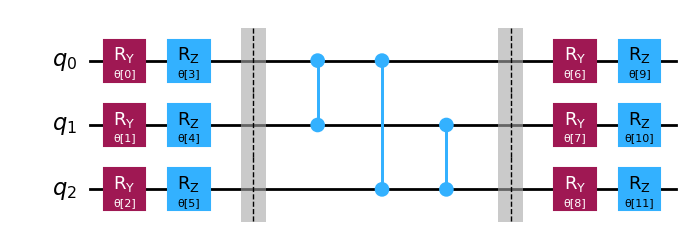

In [10]:
num_qubits = 3 #Add your code here
rotation_blocks = ['ry', 'rz'] #Add your code here
entanglement_blocks = 'cz' #Add your code here
entanglement = 'full' #Add your code here

ansatz = TwoLocal(
    num_qubits,
    rotation_blocks,
    entanglement_blocks,
    entanglement, reps=1,
    insert_barriers=True
)#Add your code here


### Don't change any code past this line ###
ansatz.decompose().draw('mpl')

ÂÖà„Åª„Å©„ÅÆÂõ≥„Åã„Çâ„ÄÅÁßÅ„Åü„Å°„ÅÆ ansatz ÂõûË∑Ø„ÅØ„Éë„É©„É°„Éº„Çø„Éº Œ∏ „ÅÆ„Éô„ÇØ„Éà„É´„Å´„Çà„Å£„Å¶ÂÆöÁæ©„Åï„Çå„ÄÅ„Åù„ÅÆÁ∑èÊï∞„ÅØÊ¨°Âºè„Åß‰∏é„Åà„Çâ„Çå„Çã„Åì„Å®„Åå„Çè„Åã„Çä„Åæ„ÅôÔºö

In [11]:
num_params = ansatz.num_parameters
num_params

12

#### Exercise 5: ISA ÂõûË∑Ø„Å∏„ÅÆ„Éà„É©„É≥„Çπ„Éë„Ç§„É´

````{admonition} Exercise
„Åì„ÅÆ‰æã„Åß„ÅØ„ÄÅ [FakeSherbrooke](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.fake_provider.FakeSherbrooke) „Çí‰ΩøÁî®„Åó„Åæ„Åô„ÄÇFakeSherbrooke „ÅØÂÅΩ„ÅÆÔºà„Ç∑„Éü„É•„É¨„Éº„Éà„Åï„Çå„ÅüÔºâ127qubit„Éê„ÉÉ„ÇØ„Ç®„É≥„Éâ„Åß„ÅÇ„Çä„ÄÅ Transpiler „ÇÑ„Åù„ÅÆ‰ªñ„ÅÆ„Éê„ÉÉ„ÇØ„Ç®„É≥„ÉâÂêë„Åë„ÅÆÊ©üËÉΩ„ÅÆ„ÉÜ„Çπ„Éà„Å´‰æøÂà©„Åß„Åô„ÄÇ

Preset pass managers „ÅØ `transpile()` Èñ¢Êï∞„Åå‰ΩøÁî®„Åô„Çã„Éá„Éï„Ç©„É´„Éà„ÅÆpass manager „Åß„Åô„ÄÇ `transpile()` „ÅØ„ÄÅtranspileÈñ¢Êï∞„ÅåÈáèÂ≠êÂõûË∑Ø„ÇíÁâπÂÆö„ÅÆ„Éê„ÉÉ„ÇØ„Ç®„É≥„Éâ„ÅßÂÆüË°å„Åô„Çã„Åü„ÇÅ„Å´ÊúÄÈÅ©Âåñ„Åä„Çà„Å≥Â§âÊèõ„Åô„ÇãÈöõ„Å´Ë°å„ÅÜ„Åì„Å®„ÇíÂèçÊò†„Åó„Åü„ÄÅ„Çπ„Çø„É≥„Éâ„Ç¢„É≠„É≥„ÅÆ PassManager „Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„ÇíÊßãÁØâ„Åô„Çã„Åü„ÇÅ„ÅÆ‰æøÂà©„Åß„Ç∑„É≥„Éó„É´„Å™„É°„ÇΩ„ÉÉ„Éâ„ÇíÊèê‰æõ„Åó„Åæ„Åô„ÄÇ

**„ÅÇ„Å™„Åü„ÅÆ„Çø„Çπ„ÇØÔºö** pass manager „ÇíÂÆöÁæ©„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇË©≥Á¥∞„ÅØ [Qiskit documentation](https://docs.quantum.ibm.com/api/qiskit/0.42/qiskit.transpiler.preset_passmanagers.generate_preset_pass_manager) „ÇíÂèÇÁÖß„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

```python
backend_answer = #Add your code
optimization_level_answer = #Add your code
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit = # Add your code
```
````

In [12]:
backend_answer = FakeSherbrooke() #Add your code
optimization_level_answer = 2 #Add your code
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit = pm.run(ansatz) # Add your code

Qiskit Runtime „ÅÆÊúÄÊñ∞„Éê„Éº„Ç∏„Éß„É≥„Åß„ÅØ„ÄÅ„Éê„ÉÉ„ÇØ„Ç®„É≥„Éâ„Å´ÊèêÂá∫„Åï„Çå„Çã„Åô„Åπ„Å¶„ÅÆÂõûË∑Ø„ÅØ„ÄÅ„Éê„ÉÉ„ÇØ„Ç®„É≥„Éâ„ÅÆ„Çø„Éº„Ç≤„ÉÉ„Éà„ÅÆÂà∂Á¥Ñ„Å´Ê∫ñÊã†„Åó„Å™„Åë„Çå„Å∞„Å™„Çä„Åæ„Åõ„Çì„ÄÇ „Åì„ÅÆ„Çà„ÅÜ„Å™ÂõûË∑Ø„ÅØ„ÄÅ[ISA (Instruction Set Architecture)](https://www.ibm.com/quantum/blog/isa-circuits?social_post=sf187802680&sf187802680=1)„ÄÅ„Å§„Åæ„Çä„Éá„Éê„Ç§„Çπ„ÅåÁêÜËß£„ÅóÂÆüË°å„Åß„Åç„ÇãÂëΩ‰ª§„Çª„ÉÉ„Éà„ÅÆË¶≥ÁÇπ„Åã„ÇâË®òËø∞„Åï„Çå„Å¶„ÅÑ„Çã„Å®Ë¶ã„Å™„Åï„Çå„Åæ„Åô„ÄÇ 

„Åì„Çå„Çâ„ÅÆ„Çø„Éº„Ç≤„ÉÉ„ÉàÂà∂Á¥Ñ„ÅØ„ÄÅ„Éá„Éê„Ç§„Çπ„ÅÆ„Éç„Ç§„ÉÜ„Ç£„Éñ„Å™Âü∫Êú¨„Ç≤„Éº„Éà„ÄÅÈáèÂ≠ê„Éì„ÉÉ„Éà„ÅÆÊé•Á∂öÊÄß„ÄÅÈñ¢ÈÄ£„Åô„ÇãÂ†¥Âêà„ÅØ„Éë„É´„Çπ„ÇÑ„Åù„ÅÆ‰ªñ„ÅÆÂëΩ‰ª§„Çø„Ç§„Éü„É≥„Ç∞‰ªïÊßò„Å™„Å©„ÅÆË¶ÅÂõ†„Å´„Çà„Å£„Å¶ÂÆöÁæ©„Åï„Çå„Åæ„Åô„ÄÇ 

ISA ÂõûË∑Ø„ÇíÂÆöÁæ©„Åô„Çã„Åü„ÇÅ„Å´„ÄÅÁßÅ„Åü„Å°„ÅØ‰ª•‰∏ã„ÇíÂÆüË°å„Åó„Åæ„ÅôÔºö

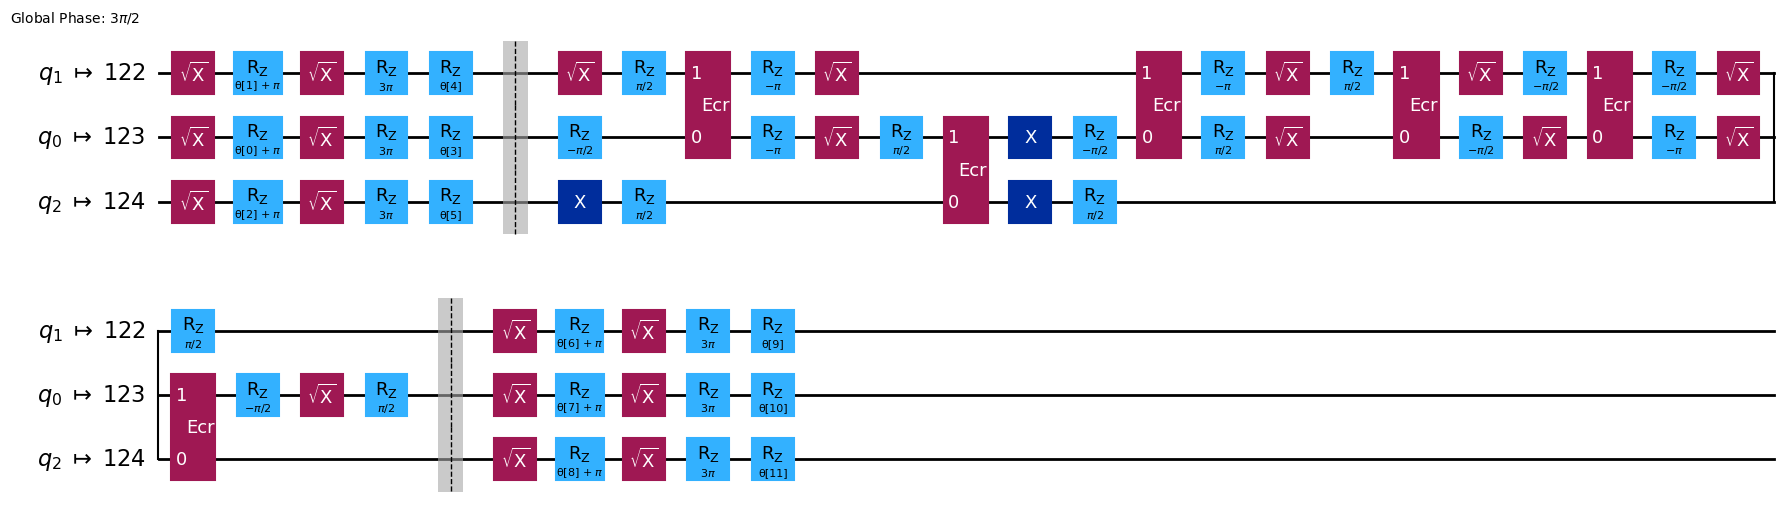

In [13]:
isa_circuit.draw('mpl', idle_wires=False,)

„ÅîË¶ß„ÅÆ„Çà„ÅÜ„Å´„ÄÅ„Éà„É©„É≥„Çπ„Éë„Ç§„É´Âæå„ÅÆÂõûË∑Ø„Å´„ÅØ„ÄÅ„Éê„ÉÉ„ÇØ„Ç®„É≥„Éâ„ÅÆ„Éç„Ç§„ÉÜ„Ç£„Éñ„Å™Âü∫Êú¨„Ç≤„Éº„Éà„Åó„ÅãÂê´„Åæ„Çå„Å¶„ÅÑ„Åæ„Åõ„Çì„ÄÇ ISAÂõûË∑Ø„ÅÆË©≥Á¥∞„Å´„Å§„ÅÑ„Å¶„ÅØ„ÄÅ„Åì„Å°„Çâ„Çí„ÅîË¶ß„Åè„Å†„Åï„ÅÑÔºö
- [ISAÂõûË∑Ø„Å®„ÅØ(ÂíåË®≥Áâà)](https://www.ibm.com/blogs/systems/jp-ja/isa-circuits/)
- [Êñ∞„Åó„ÅÑISAÂõûË∑ØË¶Å‰ª∂„ÇíÁêÜËß£„Åô„Çã](https://docs.quantum.ibm.com/announcements/news/2024-05-06-ISA-circuit-requirement#understanding-the-new-isa-circuits-requirement)

Ê¨°„ÅÆ„Çª„É´„ÇíÂÆüË°å„Åó„Å¶„Éè„Éü„É´„Éà„Éã„Ç¢„É≥„ÇíÂÆöÁæ©„Åó„ÄÅ Exercise 6„Å´ÈÄ≤„ÇÄ„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ

In [14]:
# Define our Hamiltonian
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

```{warning}
    
‰ª•‰∏ã„ÅÆ2„Å§„ÅÆ Exercise „Åß„ÅØ„ÄÅQiskit 1.0.2 „ÅßÂãï„Åã„Åó„Å¶„ÅÑ„Çã„Åì„Å®„ÇíÁ¢∫Ë™ç„Åó„Å¶„Åè„Å†„Åï„ÅÑÔºÅ

„Åì„ÅÆ„Éê„Éº„Ç∏„Éß„É≥„ÅØÊ¨°„ÅÆ„Çà„ÅÜ„Å´„Åó„Å¶„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„Åß„Åç„Åæ„Åô: **!pip install qiskit==1.0.2**
```

#### Exercise 6: „Ç≥„Çπ„ÉàÈñ¢Êï∞„ÅÆÂÆöÁæ©
````{admonition} Exercise
Â§ö„Åè„ÅÆÂè§ÂÖ∏ÁöÑ„Å™ÊúÄÈÅ©ÂåñÂïèÈ°å„Å®ÂêåÊßò„Å´„ÄÅVQEÂïèÈ°å„ÅÆËß£„ÅØ„Çπ„Ç´„É©„Éº„ÅÆ„Ç≥„Çπ„ÉàÈñ¢Êï∞„ÅÆÊúÄÂ∞èÂåñ„Å®„Åó„Å¶ÂÆöÂºèÂåñ„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ Êàë„ÄÖ„ÅÆVQE„ÅÆ„Ç≥„Çπ„ÉàÈñ¢Êï∞„ÅØÂçòÁ¥î„Åß„ÄÅ„Ç®„Éç„É´„ÇÆ„Éº„Åß„ÅôÔºÅ

**„ÅÇ„Å™„Åü„ÅÆ„Çø„Çπ„ÇØÔºö** Qiskit Runtime Estimator „Çí‰ΩøÁî®„Åó„Å¶„Ç≥„Çπ„ÉàÈñ¢Êï∞„ÇíÂÆöÁæ©„Åó„ÄÅ‰∏é„Åà„Çâ„Çå„Åü„Éë„É©„É°„Éº„Çø„ÉºÂåñ„Åï„Çå„ÅüÁä∂ÊÖã„Å®„Éè„Éü„É´„Éà„Éã„Ç¢„É≥„Å´ÂØæ„Åô„Çã„Ç®„Éç„É´„ÇÆ„Éº„ÇíÊ±Ç„ÇÅ„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

```python
def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = #Add your code
    result = #Add your code
    energy = #Add your code

    callback_dict["iters"] += #Add your code
    callback_dict["prev_vector"] = #Add your code
    callback_dict["cost_history"].#Add your code


##### Don't change any code past this line #####
    print(energy)
    return energy, result
```
````

In [15]:
def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params]) #Add your code 'pub-like' object e.g. a list of circuits or tuples
    result = estimator.run([pub]).result() #Add your code
    energy = result[0].data.evs[0] #Add your code

    callback_dict["iters"] += 1 #Add your code
    callback_dict["prev_vector"] = params #Add your code
    callback_dict["cost_history"].append(energy) #Add your code


### Don't change any code past this line ###
    print(energy)
    return energy, result

„Ç≥„Éº„É´„Éê„ÉÉ„ÇØÈñ¢Êï∞„ÅØ„ÄÅ„É¶„Éº„Ç∂„Éº„ÅåÂèçÂæ©„Ç¢„É´„Ç¥„É™„Ç∫„É† (VQE „Å™„Å©) „ÅÆ„Çπ„ÉÜ„Éº„Çø„Çπ„Å´Èñ¢„Åô„ÇãËøΩÂä†ÊÉÖÂ†±„ÇíÂèñÂæó„Åô„Çã„Åü„ÇÅ„ÅÆÊ®ôÊ∫ñÁöÑ„Å™ÊñπÊ≥ï„Åß„Åô„ÄÇ „Åó„Åã„Åó„ÄÅ„Åì„Çå‰ª•‰∏ä„ÅÆ„Åì„Å®„ÇÇÂèØËÉΩ„Åß„Åô„ÄÇ „Åì„Åì„Åß„ÅØ„ÄÅÂ§±Êïó„ÅÆ„Åü„ÇÅ„Å´„É´„Éº„ÉÅ„É≥„ÇíÂÜçÈñã„Åó„Åü„Çä„ÄÅÂà•„ÅÆÂèçÂæ©Áï™Âè∑„ÇíËøî„ÅôÂøÖË¶Å„Åå„ÅÇ„ÇãÂ†¥Âêà„Å´ÂÇô„Åà„Å¶„ÄÅ„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅÆÂêÑÂèçÂæ©„Å´„Åä„Åë„ÇãÁµêÊûú„Éô„ÇØ„Éà„É´„Çí‰øùÂ≠ò„Åô„Çã„Åü„ÇÅ„Å´„ÄÅÂ§âÊõ¥ÂèØËÉΩ„Å™„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà (ËæûÊõ∏) „Çí‰ΩøÁî®„Åó„Åæ„Åô„ÄÇ

In [16]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

### Âè§ÂÖ∏„Ç™„Éó„ÉÜ„Ç£„Éû„Ç§„Ç∂„Éº„ÅÆ‰ΩøÁî®

„Åì„Åì„Åß„ÄÅ„Ç≥„Çπ„ÉàÈñ¢Êï∞„ÇíÊúÄÂ∞èÂåñ„Åô„Çã„Åü„ÇÅ„Å´„ÄÅ‰ªªÊÑè„ÅÆÂè§ÂÖ∏„Ç™„Éó„ÉÜ„Ç£„Éû„Ç§„Ç∂„Éº„Çí‰ΩøÁî®„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇÂÆüÈöõ„ÅÆÈáèÂ≠ê„Éè„Éº„Éâ„Ç¶„Çß„Ç¢„Åß„ÅØ„ÄÅ„Ç™„Éó„ÉÜ„Ç£„Éû„Ç§„Ç∂„Éº„ÅÆÈÅ∏Êäû„ÅåÈáçË¶Å„Åß„Åô„ÄÇ„Åô„Åπ„Å¶„ÅÆ„Ç™„Éó„ÉÜ„Ç£„Éû„Ç§„Ç∂„Éº„Åå„Éé„Ç§„Ç∫„ÅÆÂ§ö„ÅÑ„Ç≥„Çπ„ÉàÈñ¢Êï∞„ÅÆ„É©„É≥„Éâ„Çπ„Ç±„Éº„Éó„ÇíÂêå„Åò„Çà„ÅÜ„Å´Êâ±„Åà„Çã„Å®„ÅØÈôê„Çâ„Å™„ÅÑ„Åã„Çâ„Åß„Åô„ÄÇ„Åì„Åì„Åß„ÅØ„ÄÅ SciPy „É´„Éº„ÉÅ„É≥„Çí‰ΩøÁî®„Åó„Åæ„Åô„ÄÇ

„É´„Éº„ÉÅ„É≥„ÇíÈñãÂßã„Åô„Çã„Åü„ÇÅ„Å´„ÄÅ„Éë„É©„É°„Éº„Çø„Éº„ÅÆÂàùÊúüÂÄ§„Å®„Åó„Å¶„É©„É≥„ÉÄ„É†„Å™„Çª„ÉÉ„Éà„ÇíÊåáÂÆö„Åó„Åæ„ÅôÔºö

In [17]:
x0 = 2 * np.pi * np.random.random(num_params)
x0

array([5.13314893, 6.08368564, 4.78654363, 4.05974472, 4.86944018,
       5.3598984 , 2.21243985, 0.25798934, 5.03440199, 5.63744607,
       0.22972544, 1.37424923])

### Qiskit PrimitivesV2„ÅÆ‰ΩøÁî®
#### Exercise 7: Âàù„ÇÅ„Å¶„ÅÆ`QiskitRuntimeService V2 Primitives` „Å® `local testing mode` „Å® `Sessions`
````{admonition} Exercise
Ê¨°„Å´„ÄÅÊñ∞„Åó„ÅÑ QiskitRuntimeService [V2 primitives](https://docs.quantum.ibm.com/api/migration-guides/v2-primitives)„Çí‰Ωø„Å£„Å¶„Åø„Åæ„Åó„Çá„ÅÜÔºö [EstimatorV2](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.EstimatorV2) „Å® [SamplerV2](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.SamplerV2) „Åß„Åô„ÄÇ

Êñ∞„Åó„ÅÑ Estimator „Ç§„É≥„Çø„Éº„Éï„Çß„Éº„Çπ„Åß„ÅØ„ÄÅ1„Å§„ÅÆÂõûË∑Ø„Å®„ÄÅ„Åù„ÅÆÂõûË∑Ø„Å´ÂØæ„Åô„ÇãË§áÊï∞„ÅÆË¶≥Ê∏¨ÂÄ§„ÇÑ„Éë„É©„É°„Éº„Çø„ÉºÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÊåáÂÆö„Åô„Çã„Åì„Å®„Åå„Åß„Åç„ÄÅ„Éë„É©„É°„Éº„Çø„ÉºÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇÑË¶≥Ê∏¨ÂÄ§„Å´ÂØæ„Åô„Çã„Çπ„Ç§„Éº„Éó„ÇíÂäπÁéáÁöÑ„Å´ÊåáÂÆö„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ ‰ª•Ââç„ÅØ„ÄÅÁµêÂêà„Åô„Çã„Éá„Éº„Çø„ÅÆ„Çµ„Ç§„Ç∫„Å´Âêà„Çè„Åõ„Å¶„ÄÅÂêå„ÅòÂõûË∑Ø„ÇíË§áÊï∞ÂõûÊåáÂÆö„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çä„Åæ„Åó„Åü„ÄÇ „Åæ„Åü„ÄÅÂºï„ÅçÁ∂ö„Åç„ÄÅoptimization_level „Å® resilience_level „ÇíÁ∞°Âçò„Å™„É¨„Éô„É´Ë™øÊï¥„Å®„Åó„Å¶‰ΩøÁî®„Åô„Çã„Åì„Å®„Åå„Åß„Åç„ÄÅ„Åï„Çâ„Å´ V2 primitives „Åß„ÅØ„ÄÅÂÄã„ÄÖ„ÅÆ„Ç®„É©„ÉºÁ∑©Âíå/ÊäëÂà∂„É°„ÇΩ„ÉÉ„Éâ„Çí„Ç™„É≥/„Ç™„Éï„Åó„Å¶„ÄÅ„Éã„Éº„Ç∫„Å´Âêà„Çè„Åõ„Å¶„Ç´„Çπ„Çø„Éû„Ç§„Ç∫„Åß„Åç„ÇãÊüîËªüÊÄß„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

Sampler V2 „ÅØ„ÄÅÈáèÂ≠êÂõûË∑Ø„ÅÆÂÆüË°å„Åã„ÇâÈáèÂ≠ê„É¨„Ç∏„Çπ„Çø„Éº„Çí„Çµ„É≥„Éó„É™„É≥„Ç∞„Åô„Çã„Å®„ÅÑ„ÅÜ„Ç≥„Ç¢„Çø„Çπ„ÇØ„Å´ÈõÜ‰∏≠„Åô„Çã„Åü„ÇÅ„Å´Á∞°Á¥†Âåñ„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ „Éó„É≠„Ç∞„É©„É†„Å´„Çà„Å£„Å¶ÂÆöÁæ©„Åï„Çå„Åü„Çø„Ç§„Éó„ÅÆ„Çµ„É≥„Éó„É´„ÇíÈáç„Åø„Å™„Åó„ÅßËøî„Åó„Åæ„Åô„ÄÇ „Åæ„Åü„ÄÅÂá∫Âäõ„Éá„Éº„Çø„ÅØ„Éó„É≠„Ç∞„É©„É†„ÅßÂÆöÁæ©„Åï„Çå„ÅüÂá∫Âäõ„É¨„Ç∏„Çπ„Çø„ÉºÂêç„ÅßÂå∫Âàá„Çâ„Çå„Åæ„Åô„ÄÇ „Åì„ÅÆÂ§âÊõ¥„Å´„Çà„Çä„ÄÅÂ∞ÜÊù•ÁöÑ„Å´„ÅØÂè§ÂÖ∏ÁöÑ„Å™Âà∂Âæ°„Éï„É≠„Éº„ÇíÊåÅ„Å§ÂõûË∑Ø„ÅÆ„Çµ„Éù„Éº„Éà„ÅåÂèØËÉΩ„Å´„Å™„Çä„Åæ„Åô„ÄÇ

„Åæ„Åü„ÄÅQiskit„ÅÆ1.0 „ÅÆ [local testing mode](https://docs.quantum.ibm.com/verify/local-testing-mode) „Çí‰ΩøÁî®„Åó„Åæ„Åô„ÄÇlocal testing mode (qiskit-ibm-runtime 0.22.0‰ª•Èôç„ÅßÂà©Áî®ÂèØËÉΩ) „ÅØ„ÄÅ„Éó„É≠„Ç∞„É©„É†„ÇíÂæÆË™øÊï¥„Åó„Å¶ÂÆüÈöõ„ÅÆÈáèÂ≠ê„Éè„Éº„Éâ„Ç¶„Çß„Ç¢„Å´ÈÄÅ‰ø°„Åô„ÇãÂâç„Å´„ÄÅ„Éó„É≠„Ç∞„É©„É†„ÅÆÈñãÁô∫„ÇÑ„ÉÜ„Çπ„Éà„Å´ÂΩπÁ´ã„Å°„Åæ„Åô„ÄÇ


**„ÅÇ„Å™„Åü„ÅÆ„Çø„Çπ„ÇØÔºö** local testing mode „Çí‰ΩøÁî®„Åó„Å¶„Éó„É≠„Ç∞„É©„É†„ÇíÊ§úË®º„Åó„ÅüÂæå„ÄÅIBM Quantum „Ç∑„Çπ„ÉÜ„É†„ÅßÂÆüË°å„Åô„Çã„Åü„ÇÅ„Å´„Éê„ÉÉ„ÇØ„Ç®„É≥„ÉâÂêç„ÇíÂ§âÊõ¥„Åô„Çã„Å†„Åë„Åß„Åô„ÄÇ

```python
##### Select a Backend
##### Use FakeSherbrooke to simulate with noise that matches closer to the real experiment. This will run slower.
##### Use AerSimulator to simulate without noise to quickly iterate. This will run faster.

backend = FakeSherbrooke()
##### backend = AerSimulator()

##### Don't change any code past this line #####

##### Here we have updated the cost function to return only the energy to be compatible with recent scipy versions (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

with Session(backend=backend) as session:
    estimator = Estimator(session=session)

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, hamiltonian_isa, estimator, callback_dict),
        method="cobyla",
        options={'maxiter': 30})
```
````

In [18]:
### Select a Backend
## Use FakeSherbrooke to simulate with noise that matches closer to the real experiment. This will run slower.
## Use AerSimulator to simulate without noise to quickly iterate. This will run faster.

backend = FakeSherbrooke()
# backend = AerSimulator()

# ### Don't change any code past this line ###

# Here we have updated the cost function to return only the energy to be compatible with recent scipy versions (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

with Session(backend=backend) as session:
    estimator = Estimator(session=session)

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, hamiltonian_isa, estimator, callback_dict),
        method="cobyla",
        options={'maxiter': 30})

/home/dmurata/workspace/quantum/ibm-quantum-challenge-textbook/.venv/lib/python3.11/site-packages/qiskit_ibm_runtime/session.py:157: UserWarning: Session is not supported in local testing mode or when using a simulator.
  warnings.warn(


0.43115234375
-0.16455078125
-0.2734375
0.1396484375
-0.26806640625
-0.265625
-0.5146484375
-0.8828125
-1.33251953125
-0.80712890625
-1.3095703125
-1.32861328125
-1.37255859375
-1.2568359375
-1.07080078125
-1.01904296875
-1.349609375
-1.20068359375
-1.33447265625
-1.2216796875
-1.28466796875
-1.142578125
-1.3388671875
-1.3447265625
-1.34814453125
-1.3056640625
-1.45751953125
-1.447265625
-1.60986328125
-1.732421875


```{tip}
ÊúÄÈÅ©Âåñ„ÅåË¶ã„Çâ„Çå„Å™„ÅÑÂ†¥Âêà„ÅØ„ÄÅmaximiter„ÇíÂ§âÊõ¥„Åô„Çã
„ÇÇ„ÅóCost„ÅåÊúÄÂ∞èÂåñ„Åï„Çå„Å™„ÅÑÂ†¥Âêà„ÅØ„ÄÅ maximeter „Çí‰∏ä„Åí (100„ÅåÈÅ©Âàá) „ÄÅEx 7 „ÇíÂÜçÂ∫¶ÂÆüË°å„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ    
```

ÁµêÊûú„ÇíË¶ã„Å¶„Åø„Åæ„Åó„Çá„ÅÜ:

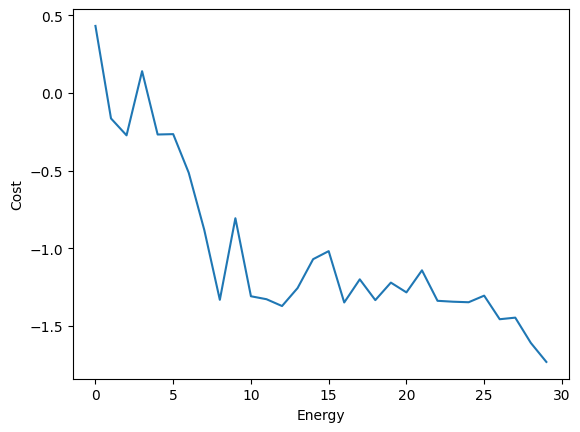

In [19]:
fig, ax = plt.subplots()
plt.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
plt.xlabel("Energy")
plt.ylabel("Cost")
plt.draw()

üéâ ‰∫àÊÉ≥ÈÄö„Çä„ÄÅÊàë„ÄÖ„ÅÆ VQE „Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅØ„ÄÅÂü∫Â∫ïÁä∂ÊÖã„Å´Âà∞ÈÅî„Åô„Çã„Åæ„Åß„ÅÆÂèçÂæ©„Å´„Åä„ÅÑ„Å¶„Ç®„Éç„É´„ÇÆ„Éº„ÇíÊúÄÂ∞èÂåñ„Åó„Åæ„Åó„Åü„ÄÇ Qiskit 1.0 „ÅÆÊñ∞Ê©üËÉΩ„Çí‰Ωø„Å£„Åü VQE „Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅÆÂÆüË£Ö„Å´ÊàêÂäü„Åó„Åæ„Åó„ÅüÔºÅ

„Åì„ÅÆ„ÉÅ„É£„É¨„É≥„Ç∏„ÇíÂÆå‰∫Ü„Åó„Å¶„ÅÑ„Åü„Å†„Åç„ÅÇ„Çä„Åå„Å®„ÅÜ„Åî„Åñ„ÅÑ„Åæ„Åô„ÄÇÊÆã„Çä„ÅÆ„ÉÅ„É£„É¨„É≥„Ç∏„ÇÇÈ†ëÂºµ„Å£„Å¶„Åè„Å†„Åï„ÅÑ!

## ËøΩÂä†ÊÉÖÂ†±

**Created by:** James Weaver, Maria Gragera Garces

**Advised by:** Junye Huang

**Translated by:** Kifumi Numata

Version: 1.1.0